In [123]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
from keras.models import load_model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df_slice = pd.read_csv('../Dataset/Normalisasi/processed_dataset_slice_norm.csv',sep=',')

In [3]:
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,0.647059,0.055556,0.0,0.000640
1,0.705882,0.333333,0.5,0.081254
2,0.882353,0.555556,0.0,0.000534
3,0.941176,0.833333,0.5,0.014585
4,0.647059,0.111111,1.0,0.618070


## Load Model

In [6]:
lstm_model = load_model('lstm_slice.h5')
lstm_model

In [21]:
x_train,x_test,y_train,y_test = train_test_split(slice_x,slice_y,test_size=0.30,random_state=9)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(50540, 4, 1)

In [9]:
lstm_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1580/1580 [==============================] - 12s 7ms/step - loss: 0.2241 - accuracy: 0.8803 - mean_squared_error: 0.4133 - mean_absolute_error: 0.4636
Epoch 2/10
1580/1580 [==============================] - 14s 9ms/step - loss: 0.2258 - accuracy: 0.8799 - mean_squared_error: 0.4131 - mean_absolute_error: 0.4636
Epoch 3/10
1580/1580 [==============================] - 12s 8ms/step - loss: 0.2234 - accuracy: 0.8810 - mean_squared_error: 0.4134 - mean_absolute_error: 0.4636
Epoch 4/10
1580/1580 [==============================] - 13s 8ms/step - loss: 0.2244 - accuracy: 0.8792 - mean_squared_error: 0.4133 - mean_absolute_error: 0.4636
Epoch 5/10
1580/1580 [==============================] - 13s 8ms/step - loss: 0.2250 - accuracy: 0.8808 - mean_squared_error: 0.4134 - mean_absolute_error: 0.4636
Epoch 6/10
1580/1580 [==============================] - 13s 8ms/step - loss: 0.2226 - accuracy: 0.8816 - mean_squared_error: 0.4135 - mean_absolute_error: 0.4636
Epoch 7/10
1580/1580 [======

In [59]:
y_pred_train = lstm_model.predict(x_train)
y_pred_train

array([[9.9991632e-01, 8.3732615e-05, 1.9376903e-20],
       [9.9326199e-01, 6.7380099e-03, 1.2927471e-16],
       [5.2889018e-06, 9.9999475e-01, 2.6599975e-34],
       ...,
       [3.1800169e-04, 9.9968207e-01, 3.1936225e-27],
       [2.1885833e-01, 7.8114164e-01, 5.0855236e-17],
       [2.5509350e-04, 9.9974495e-01, 4.4683120e-28]], dtype=float32)

In [68]:
df_x_train = x_train_awal
df_x_train['lstm_result'] = y_pred_train
df_x_train['label'] = y_train
df_x_train

,dst,src,Protocol,bytecount,lstm_result,label
52757,0.882353,0.000000,1.0,0.532565,0.999916,0
28936,0.941176,0.111111,1.0,0.848030,0.993262,0
17678,0.882353,0.555556,0.0,0.562899,0.000005,1
54228,0.705882,0.111111,0.5,0.068673,0.142433,0
16503,0.882353,0.166667,0.0,0.000123,0.999976,0
...,...,...,...,...,...,...
42747,0.647059,0.111111,1.0,0.976527,0.382491,1
22584,0.000000,0.888889,0.0,0.000423,0.999935,0
65462,0.941176,0.055556,1.0,0.241881,0.000318,1
66037,0.941176,0.722222,0.5,0.068629,0.218858,0


In [69]:
y_test_pred = lstm_model.predict(x_test)
df_x_test = x_test_awal
df_x_test['lstm_result'] = y_test_pred
df_x_test['label'] = y_test
df_x_test

,dst,src,Protocol,bytecount,lstm_result,label
11713,0.764706,0.555556,1.0,0.477935,0.452476,0
52924,0.647059,0.388889,0.5,0.105974,0.986359,0
4045,0.647059,0.055556,0.0,0.826409,0.000016,1
54476,0.294118,1.000000,0.0,0.000046,0.999987,0
19341,0.647059,0.111111,1.0,0.977027,0.382294,1
...,...,...,...,...,...,...
21721,0.176471,0.777778,0.0,0.000421,0.999985,0
55392,0.941176,0.000000,1.0,0.717873,0.999902,0
30108,0.941176,0.888889,0.0,0.000481,0.999995,0
49565,0.176471,0.888889,0.0,0.263331,0.000069,1


In [70]:
df_x_train.to_csv('data_latih.csv', sep=',', index=False)
df_x_test.to_csv('data_test.csv',sep=',', index=False)

## Naive Bayes Model

In [ ]:
nb_classifier = GaussianNB()
nb_classifier


GaussianNB()

In [72]:
df_train = pd.read_csv('data_latih.csv', sep=',')
df_test = pd.read_csv('data_test.csv', sep=',')

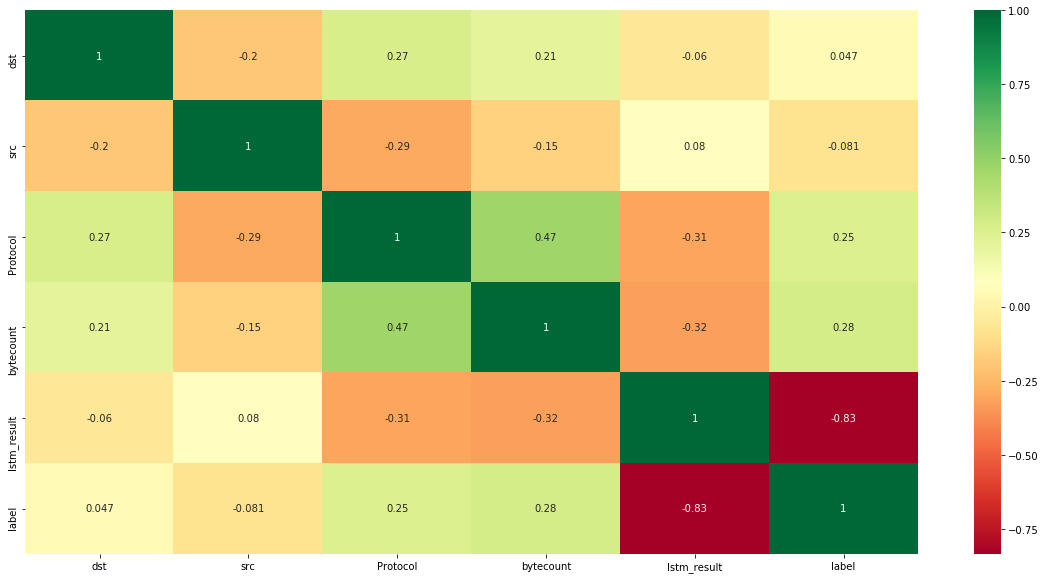

In [90]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [96]:
x_train = df_train[['Protocol', 'lstm_result']]
y_train = df_train['label']

x_test = df_test[['Protocol', 'lstm_result']]
y_test = df_test['label']

In [97]:
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [98]:
train_pred = nb_classifier.predict(x_train)
test_pred = nb_classifier.predict(x_test)

In [99]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in train_pred]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[30789     0]
 [19751     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     30789
           1       0.00      0.00      0.00     19751

    accuracy                           0.61     50540
   macro avg       0.30      0.50      0.38     50540
weighted avg       0.37      0.61      0.46     50540

Accuracy: 60.9200633161852


In [100]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in test_pred]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[13230     0]
 [ 8431     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     13230
           1       0.00      0.00      0.00      8431

    accuracy                           0.61     21661
   macro avg       0.31      0.50      0.38     21661
weighted avg       0.37      0.61      0.46     21661

Accuracy: 61.07751258021329


In [125]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [135]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

NB_Feature_Grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='accuracy' ,verbose=1, cv=10, n_jobs=1)
NB_Feature_Grid.fit(x_train, y_train)
print(NB_Feature_Grid.best_estimator_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(var_smoothing=0.5831305113526223)


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  4.6min finished


In [136]:
print(NB_Feature_Grid.best_score_)

0.8917688959240208


In [138]:
best_estimator = NB_Feature_Grid.best_estimator_
best_estimator

GaussianNB(var_smoothing=0.5831305113526223)

In [139]:
#Save Best Estimator 
joblib.dump(best_estimator, 'naive_bayes_final.pkl')

['naive_bayes_final.pkl']

In [142]:
best_nb = best_estimator
train_pred = best_nb.predict(x_train)
test_pred = best_nb.predict(x_test)

In [146]:
print(confusion_matrix(y_train, train_pred))
print(classification_report(y_train, train_pred))
print("Accuracy:",accuracy_score(y_train, train_pred)*100)


[[27491  3298]
 [ 2176 17575]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     30789
           1       0.84      0.89      0.87     19751

    accuracy                           0.89     50540
   macro avg       0.88      0.89      0.89     50540
weighted avg       0.89      0.89      0.89     50540

Accuracy: 89.16897506925207


In [147]:
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print("Accuracy:",accuracy_score(y_test, test_pred)*100)

[[11735  1495]
 [ 1014  7417]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     13230
           1       0.83      0.88      0.86      8431

    accuracy                           0.88     21661
   macro avg       0.88      0.88      0.88     21661
weighted avg       0.89      0.88      0.88     21661

Accuracy: 88.41697059230876
